In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/kaggle/input/malllcustome/Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


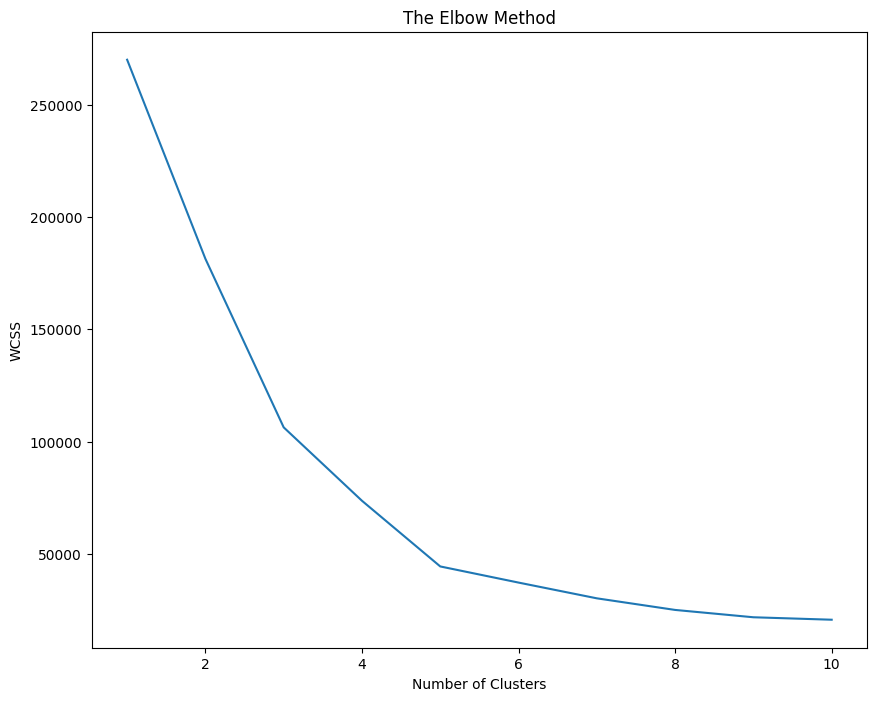

In [9]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

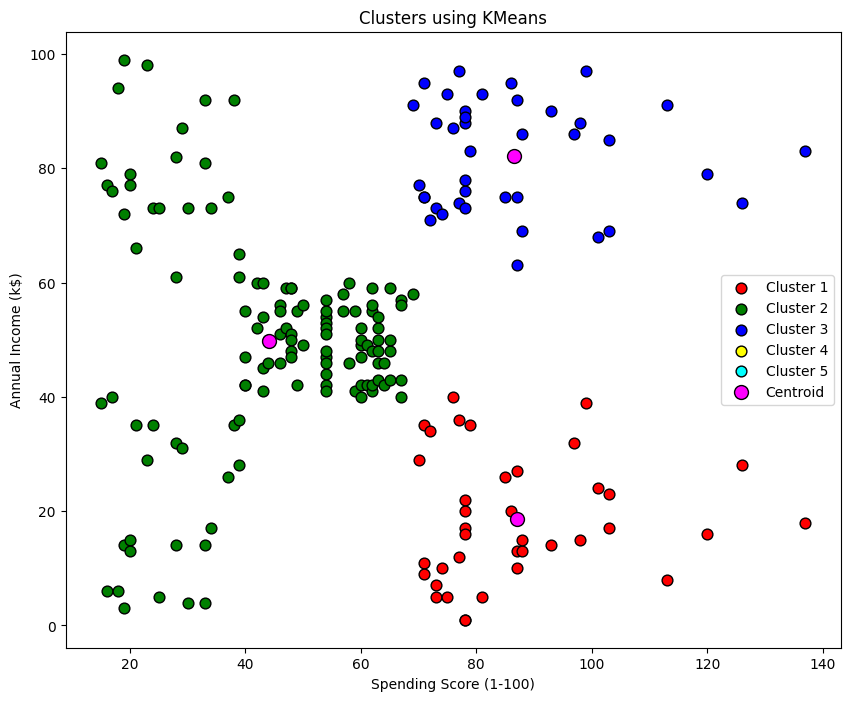

In [16]:
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz score
calinski_harabasz_score_value = calinski_harabasz_score(X, y_kmeans)

# Print the Calinski-Harabasz score
print(f"Calinski-Harabasz Score: {calinski_harabasz_score_value}")

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score_value = davies_bouldin_score(X, y_kmeans)

print(f"Davies-Bouldin Score: {davies_bouldin_score_value}")


Silhouette Score: 0.46761358158775435
Calinski-Harabasz Score: 151.5570090006799
Davies-Bouldin Score: 0.715276820248462


ValueError: could not convert string to float: 'Male'

Hierarchichal

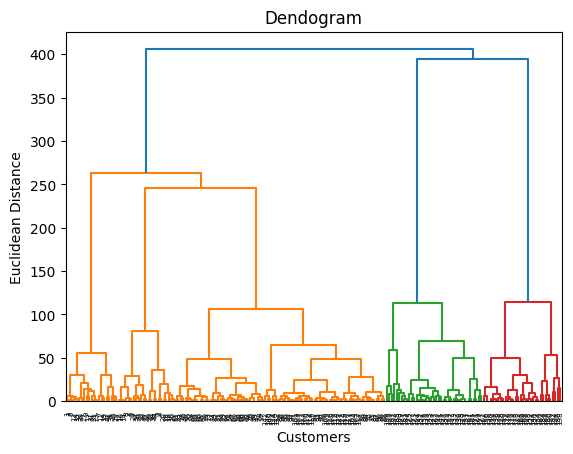

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


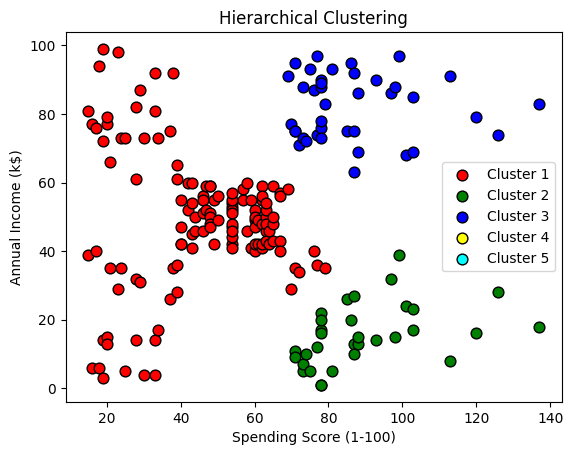

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Hierarchical Clustering')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, y_hc)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz score
calinski_harabasz_score_value = calinski_harabasz_score(X, y_hc)

# Print the Calinski-Harabasz score
print(f"Calinski-Harabasz Score: {calinski_harabasz_score_value}")

from sklearn.metrics import davies_bouldin_score

davies_bouldin_score_value = davies_bouldin_score(X, y_hc)

print(f"Davies-Bouldin Score: {davies_bouldin_score_value}")


Silhouette Score: 0.4618340266628975
Calinski-Harabasz Score: 143.81953140807286
Davies-Bouldin Score: 0.7068435076376502
